In [75]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (10, 7)

In [76]:
data = pd.read_csv('/home/jvdzwaan/data/dilipad/CHES/data/1999-2014_CHES_dataset_means.csv')
data = data[data['country']=='nl']
# select years (not 2014)
data = data[data['year']!=2014]
# replace value of 'center' with 5 and make numeric
data.loc[413, 'lrgen'] = 5.0
data.loc[435, 'lrecon'] = 5.0
data[['lrgen', 'lrecon']]
data['lrgen'] = pd.to_numeric(data['lrgen'])
data['lrecon'] = pd.to_numeric(data['lrecon'])
data['party'] = data['party'].replace({'GL': 'GroenLinks'}, regex=True)
data['party'] = data['party'].replace({'CU': 'ChristenUnie'}, regex=True)
data

,country,eastwest,eumember,year,expert,party_id,cmp_id,party,vote,seat,...,us_salience,ethnic_minorities,ethnic_salience,econ_interven,nationalism,antielite_salience,corrupt_salience,mip_one,mip_two,mip_three
395,nl,west,EU member state,1999,11,1001,22521,CDA,18.4,19.299999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,nl,west,EU member state,2002,9,1001,22521,CDA,27.9,28.700001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,nl,west,EU member state,2006,12,1001,22521,CDA,26.5,27.299999,...,5.00,5.400000,5.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,nl,west,EU member state,2010,14,1001,22521,CDA,13.6,14.000000,...,NaN,6.000000,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,nl,west,EU member state,1999,11,1002,22320,PvdA,29.0,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,nl,west,EU member state,2002,9,1002,22320,PvdA,15.1,15.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,nl,west,EU member state,2006,12,1002,22320,PvdA,21.2,22.000000,...,5.33,4.000000,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,nl,west,EU member state,2010,14,1002,22320,PvdA,19.6,20.000000,...,NaN,4.000000,5.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,nl,west,EU member state,1999,11,1003,22420,VVD,24.7,25.299999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,nl,west,EU member state,2002,9,1003,22420,VVD,15.4,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.groupby('party').mean()['lrgen']

party
CD              9.375000
CDA             5.926428
ChristenUnie    5.995714
D66             4.620000
GPV             6.700000
GroenLinks      2.462857
LPF             8.375000
PVV             8.707693
PvdA            3.846786
PvdD            3.363636
RPF             6.800000
SGP             7.828571
SP              1.503214
VVD             7.396786
Name: lrgen, dtype: float64

In [78]:
from cptm.utils.experiment import load_topics, load_opinions


config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years/all_years-adj-parties/{}",
    "nTopics": 100
}

topics = load_topics(config)
opinions = load_opinions(config)

In [79]:
from cptm.utils.controversialissues import perspective_jsd_matrix

jsd = perspective_jsd_matrix(opinions, config.get('nTopics'))
jsd.shape

(100, 16, 16)

In [80]:
avg_jsd_per_topic = np.average(jsd, axis=0)
avg_jsd_per_topic.shape
avg_jsd_per_topic

array([[ 0.        ,  0.2011507 ,  0.57349103,  0.64228999,  0.65147257,
         0.61452863,  0.50886281,  0.61725698,  0.52596246,  0.44205238,
         0.07484544,  0.26969998,  0.07497029,  0.62508097,  0.12330269,
         0.03850501],
       [ 0.2011507 ,  0.        ,  0.55318414,  0.60297683,  0.60838679,
         0.57968042,  0.50689812,  0.57732253,  0.51383775,  0.46060155,
         0.22724252,  0.34609596,  0.22782237,  0.59048122,  0.26390766,
         0.20709543],
       [ 0.57349103,  0.55318414,  0.        ,  0.48502074,  0.48172221,
         0.48113673,  0.49385026,  0.49656841,  0.48962521,  0.51858654,
         0.55332213,  0.51462461,  0.55314338,  0.47790308,  0.54964435,
         0.5666133 ],
       [ 0.64228999,  0.60297683,  0.48502074,  0.        ,  0.45642808,
         0.48379763,  0.49143673,  0.48649379,  0.48580787,  0.53829433,
         0.61262507,  0.55759154,  0.61722862,  0.45503465,  0.60780965,
         0.63436994],
       [ 0.65147257,  0.60838679,  0

In [81]:
def create_jsd_ranking(jsd, opinions, ches_ranking):
    ps = opinions.keys()
    top =  ches_ranking.index[0]
    index1 = ps.index(top)
    parties = []
    dist = []
    for party in ches_ranking.index:
        if party in ps:
            parties.append(party)
            dist.append(jsd[index1, ps.index(party)])
    return pd.DataFrame(data=dist, index=parties, columns=['distance']).sort_values(by='distance')

ches_ranking = data.groupby('party').mean().sort_values(by='lrecon')['lrecon']
print ches_ranking
print create_jsd_ranking(avg_jsd_per_topic, opinions, ches_ranking)

party
SP              1.072500
GroenLinks      2.322500
PvdD            3.555555
PvdA            3.827857
ChristenUnie    4.820000
D66             5.182500
GPV             5.800000
CDA             5.895000
RPF             6.000000
PVV             6.760385
SGP             6.766667
VVD             7.893929
LPF             8.110000
CD              8.571428
Name: lrecon, dtype: float64
              distance
SP            0.000000
PvdA          0.468947
GroenLinks    0.482085
VVD           0.482425
CDA           0.486494
D66           0.496568
ChristenUnie  0.498409
SGP           0.512909
PVV           0.516031
LPF           0.547604
PvdD          0.577323
RPF           0.596187
GPV           0.598219


Index([u'SP', u'GroenLinks', u'PvdD', u'PvdA', u'ChristenUnie', u'D66', u'GPV',
       u'CDA', u'RPF', u'PVV', u'SGP', u'VVD', u'LPF', u'CD'],
      dtype='object', name=u'party')
[ 1.07249999  2.32250002  3.55555534  3.82785722  4.82        5.18250002
  5.80000019  5.89500005  6.          6.76038458  6.76666673  7.89392856
  8.11        8.5714283 ]


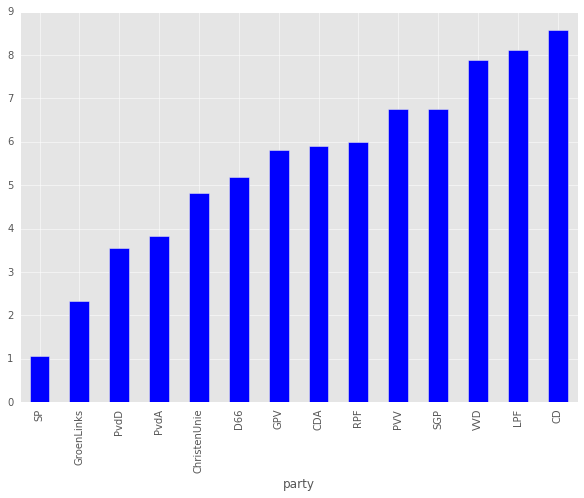

In [82]:
print ches_ranking.index
print ches_ranking.values

ches_ranking.plot(kind='bar')

In [83]:
# make matrix with opinions on rows and perspectives on columns
res = {}
for p, data in opinions.iteritems():
    #print p
    #print len(data.values.flatten())
    res[p] = data.values.flatten()
data = pd.DataFrame(res).T
data

,0,1,2,3,4,5,6,7,8,9,...,576190,576191,576192,576193,576194,576195,576196,576197,576198,576199
50PLUS,0.000158,0.000171,0.000172,0.000169,0.000173,0.000170,0.000159,0.000171,0.000171,0.000162,...,0.000169,0.000170,0.000173,0.000164,0.000134,0.000172,0.000171,0.000172,0.000172,0.000171
CDA,0.000008,0.000044,0.000006,0.000013,0.000008,0.000013,0.000011,0.000011,0.000012,0.000007,...,0.000033,0.000011,0.000011,0.000379,0.000019,0.000008,0.000011,0.000958,0.000983,0.000008
ChristenUnie,0.000019,0.000020,0.000015,0.000037,0.000016,0.000026,0.000043,0.000034,0.000026,0.000021,...,0.000017,0.000023,0.000160,0.003157,0.000049,0.000470,0.000027,0.000299,0.000031,0.000016
D66,0.000012,0.000015,0.000012,0.000025,0.000021,0.000019,0.000017,0.000021,0.000019,0.000018,...,0.000017,0.000194,0.000027,0.000019,0.000032,0.004471,0.000543,0.000020,0.000023,0.000143
GPV,0.000128,0.000162,0.000113,0.000168,0.000166,0.000155,0.000168,0.000165,0.000171,0.000151,...,0.000076,0.000115,0.000121,0.000139,0.000165,0.000147,0.000154,0.000146,0.000156,0.000149
GroenLinks,0.000006,0.000010,0.000009,0.000018,0.000015,0.000009,0.000018,0.000019,0.000748,0.000006,...,0.000008,0.000013,0.000018,0.000711,0.000019,0.000016,0.000017,0.000529,0.000019,0.000088
LPF,0.000041,0.000049,0.000046,0.000081,0.000069,0.000062,0.000063,0.000070,0.000064,0.000066,...,0.005677,0.000088,0.000118,0.000098,0.000106,0.000042,0.000459,0.000115,0.000110,0.000095
Leefbaar Nederland,0.000146,0.000142,0.000156,0.000163,0.000153,0.000169,0.000170,0.000119,0.000161,0.000169,...,0.000151,0.000160,0.000170,0.000170,0.000167,0.000166,0.000166,0.000168,0.000162,0.000169
OSF,0.000119,0.000153,0.000044,0.000159,0.000160,0.000137,0.000164,0.000144,0.000122,0.000070,...,0.000061,0.000116,0.000119,0.000126,0.000127,0.000138,0.000091,0.000125,0.000136,0.000164
PVV,0.000026,0.000046,0.000031,0.000028,0.000059,0.000047,0.000053,0.000064,0.000018,0.000024,...,0.000029,0.000054,0.000059,0.000051,0.000040,0.000042,0.000243,0.002656,0.000048,0.000023


In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(data)
print(pca.explained_variance_ratio_) 

[ 0.27349533  0.09480558  0.07906594  0.07656774  0.07148353  0.07062153
  0.06383968  0.05775706  0.05482523  0.05305614]


In [85]:
pca = PCA(n_components=2)
res = pca.fit_transform(data)
print(pca.explained_variance_ratio_) 
print res

[ 0.27349533  0.09480558]
[[-0.49451746  0.02739567]
 [ 0.43987172  0.06087574]
 [ 0.26961982  0.28004399]
 [ 0.34165033  0.02697142]
 [-0.43746493  0.0514999 ]
 [ 0.38966318 -0.0717829 ]
 [-0.23886133 -0.00603996]
 [-0.48290307  0.02432731]
 [-0.43631056  0.04529456]
 [ 0.00308724 -0.74365299]
 [ 0.43010025  0.00096361]
 [-0.34202606  0.07284851]
 [-0.44934516  0.03131151]
 [ 0.23811717  0.36488151]
 [ 0.36939692 -0.08395903]
 [ 0.39992195 -0.08097883]]


In [86]:
ranking = pd.DataFrame(res, index=data.index, columns=['pca1', 'pca2'])
ranking.sort_values(by='pca2')

,pca1,pca2
PVV,0.003087,-0.743653
SP,0.369397,-0.083959
VVD,0.399922,-0.080979
GroenLinks,0.389663,-0.071783
LPF,-0.238861,-0.006040
PvdA,0.430100,0.000964
Leefbaar Nederland,-0.482903,0.024327
D66,0.341650,0.026971
50PLUS,-0.494517,0.027396
RPF,-0.449345,0.031312


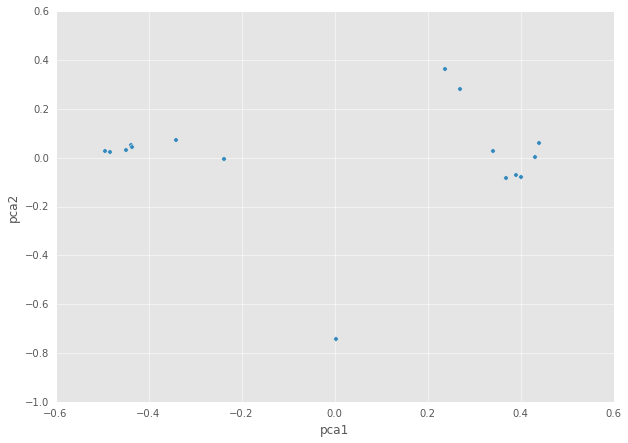

In [87]:
fig, ax = plt.subplots()
ranking.plot('pca1', 'pca2', kind='scatter', ax=ax)

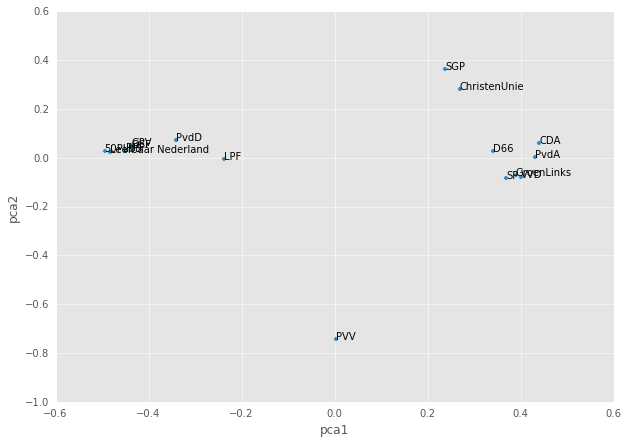

In [88]:
fig, ax = plt.subplots()
ranking.plot('pca1', 'pca2', kind='scatter', ax=ax)

for k, v in ranking.iterrows():
    ax.annotate(k, v)

In [89]:
pca = PCA(n_components=3)
res = pca.fit_transform(data)
print(pca.explained_variance_ratio_) 
print res

[ 0.27349533  0.09480558  0.07906594]
[[-0.49451746  0.02739567 -0.029082  ]
 [ 0.43987172  0.06087574  0.06404359]
 [ 0.26961982  0.28004399  0.49062642]
 [ 0.34165033  0.02697142 -0.24816302]
 [-0.43746493  0.0514999  -0.03533503]
 [ 0.38966318 -0.0717829  -0.19510128]
 [-0.23886133 -0.00603996 -0.03607332]
 [-0.48290307  0.02432731 -0.0313651 ]
 [-0.43631056  0.04529456 -0.04332932]
 [ 0.00308724 -0.74365299  0.3601218 ]
 [ 0.43010025  0.00096361 -0.13602723]
 [-0.34202606  0.07284851 -0.08498136]
 [-0.44934516  0.03131151 -0.02816253]
 [ 0.23811717  0.36488151  0.28458022]
 [ 0.36939692 -0.08395903 -0.27624447]
 [ 0.39992195 -0.08097883 -0.05550738]]


In [90]:
ranking = pd.DataFrame(res, index=data.index, columns=['pca1', 'pca2', 'pca3'])
ranking.sort_values(by='pca1')

,pca1,pca2,pca3
50PLUS,-0.494517,0.027396,-0.029082
Leefbaar Nederland,-0.482903,0.024327,-0.031365
RPF,-0.449345,0.031312,-0.028163
GPV,-0.437465,0.051500,-0.035335
OSF,-0.436311,0.045295,-0.043329
PvdD,-0.342026,0.072849,-0.084981
LPF,-0.238861,-0.006040,-0.036073
PVV,0.003087,-0.743653,0.360122
SGP,0.238117,0.364882,0.284580
ChristenUnie,0.269620,0.280044,0.490626


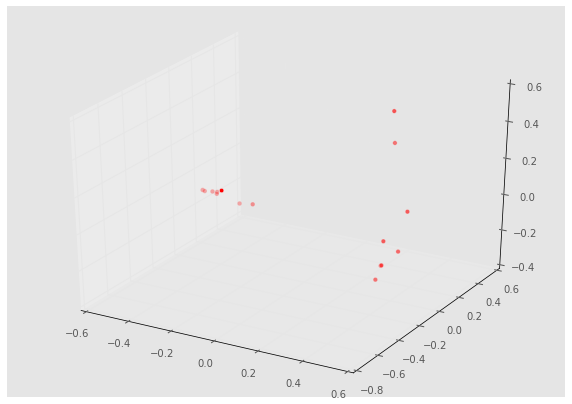

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ranking['pca1'], ranking['pca2'], ranking['pca3'], c='red', marker='o')

#for k in ranking.iterrows():
#    ax.annotate(k[0], k[1:])
#    print k